In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

from keras.preprocessing import image
from skimage.io import imread
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras import backend as K


In [2]:
from sklearn.model_selection import KFold

In [10]:
test_path = "F:\\dlk_data\\task dataset\\hotdog or not\\test"
train_path = "F:\\dlk_data\\task dataset\\hotdog or not\\train"

In [11]:
# Creating a list of labels
labels = os.listdir(train_path)

# Viewing the labels
labels

['hot_dog', 'not_hot_dog']

In [12]:
# get all the data in the directory split/train and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path, 
        target_size=(227, 227), batch_size=500)

# get all the data in the directory split/test and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(227, 227), batch_size = 500) 

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [14]:
# Splitting a validation dataset from the train dataset

train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.20, 
                                                                      random_state=42)

[0. 1.]


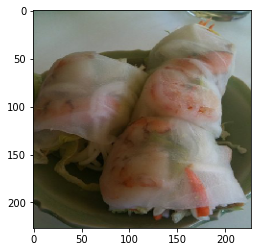

In [15]:
# Checking a sample image and its label

display(plt.imshow(train_images[10]))
print(train_labels[10])

In [20]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(227,227,3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="sigmoid"))
 
model.layers[-6].trainable = False
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 17,938,626
Trainable params: 3,223,938
Non-trainable params: 14,714,688
__________________________________

In [21]:
# Setting up the Augmentation
datagen = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

# fit parameters from train_images
datagen.fit(train_images, augment=True)

In [22]:
# Compiling the model
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# Setting the learning rate as 0.0015
K.set_value(model.optimizer.learning_rate, 0.0015)

In [23]:
results = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs = 100, 
                        validation_data =(val_images, val_labels), steps_per_epoch=len(train_images) / 32)

Epoch 1/100
12/12 [==============================] - 154s 13s/step - loss: 0.7036 - accuracy: 0.5075 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 2/100
12/12 [==============================] - 153s 12s/step - loss: 0.6927 - accuracy: 0.5402 - val_loss: 0.6867 - val_accuracy: 0.5600
Epoch 3/100
12/12 [==============================] - 155s 13s/step - loss: 0.6870 - accuracy: 0.5528 - val_loss: 0.6848 - val_accuracy: 0.5900
Epoch 4/100
12/12 [==============================] - 151s 12s/step - loss: 0.6779 - accuracy: 0.5930 - val_loss: 0.6820 - val_accuracy: 0.5600
Epoch 5/100
12/12 [==============================] - 160s 13s/step - loss: 0.6774 - accuracy: 0.6181 - val_loss: 0.6798 - val_accuracy: 0.5300
Epoch 6/100
12/12 [==============================] - 152s 12s/step - loss: 0.6780 - accuracy: 0.5729 - val_loss: 0.6798 - val_accuracy: 0.6400
Epoch 7/100
12/12 [==============================] - 158s 13s/step - loss: 0.6681 - accuracy: 0.6608 - val_loss: 0.6739 - val_accuracy: 0.6800

KeyboardInterrupt: 

In [25]:
history = results

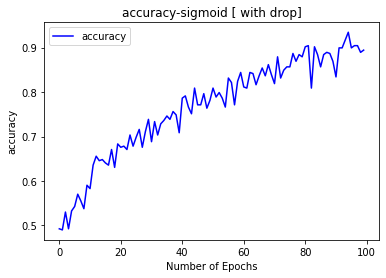

In [27]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.title("accuracy-sigmoid [ with drop]")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

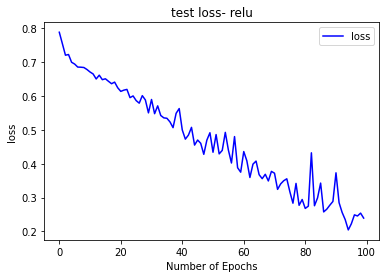

In [28]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [31]:
test_image = image.load_img('/content/8119.jpg',
                            target_size = (227,227,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('hotdog')
elif result[0][1]==1:
    print('not hotdog')

not hotdog


In [32]:
test_image = image.load_img('/content/hotdog.jpg',
                            target_size = (227,227,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('hotdog')
elif result[0][1]==1:
    print('not hotdog')

hotdog


In [33]:
model.save('hotdog.h5')

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
train = train_datagen.flow_from_directory(r"/content/seefood/train",
                                                 target_size = (227,227),
                                                 batch_size = 30,
                                                 class_mode = "categorical")

test = test_datagen.flow_from_directory(r"/content/seefood/test",
                                            target_size = (227,227),
                                            batch_size = 30,
                                            class_mode = 'categorical')

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [48]:

history1 = model.fit_generator(train,steps_per_epoch = 10,
                         epochs = 20,validation_data = test, 
                            validation_steps = 100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 20s 2s/step - loss: 0.2587 - accuracy: 0.9033 - val_loss: 0.4486 - val_accuracy: 0.7620
Epoch 2/20
10/10 [==============================] - 8s 827ms/step - loss: 0.1843 - accuracy: 0.9479
Epoch 3/20
10/10 [==============================] - 8s 823ms/step - loss: 0.1085 - accuracy: 0.9757
Epoch 4/20
10/10 [==============================] - 8s 824ms/step - loss: 0.0842 - accuracy: 0.9722
Epoch 5/20
10/10 [==============================] - 8s 821ms/step - loss: 0.1519 - accuracy: 0.9479
Epoch 6/20
10/10 [==============================] - 9s 844ms/step - loss: 0.1297 - accuracy: 0.9667
Epoch 7/20
10/10 [==============================] - 8s 843ms/step - loss: 0.4790 - accuracy: 0.7708
Epoch 8/20
10/10 [==============================] - 9s 842ms/step - loss: 0.1555 - accuracy: 0.9700
Epoch 9/20
10/10 [==============================] - 9s 844ms/step - loss: 0.1164 - accuracy: 0.9733
Epoch 10/20
10/10 [==============================] - 9s 841m

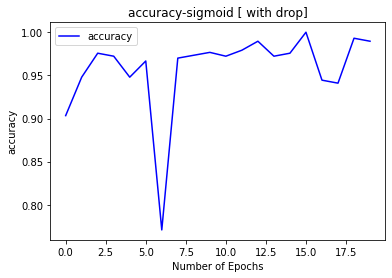

In [49]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history1.history['accuracy'], color='b', label="accuracy")
plt.title("accuracy-sigmoid [ with drop]")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

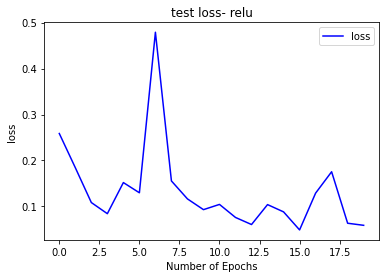

In [50]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history1.history['loss'], color='b', label="loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [46]:
test_image = image.load_img('/content/hotdog.jpg',
                            target_size = (227,227,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('hotdog')
elif result[0][1]==1:
    print('not hotdog')

hotdog


In [47]:
test_image = image.load_img('/content/not hotdog.jpg',
                            target_size = (227,227,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('hotdog')
elif result[0][1]==1:
    print('not hotdog')

not hotdog


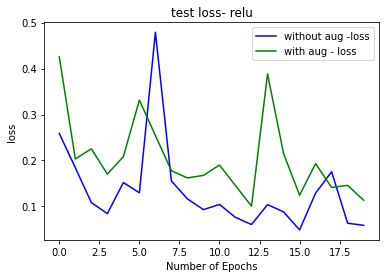

In [56]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history1.history['loss'], color='b', label="without aug -loss")
plt.plot(history.history['loss'], color='g', label="with aug - loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

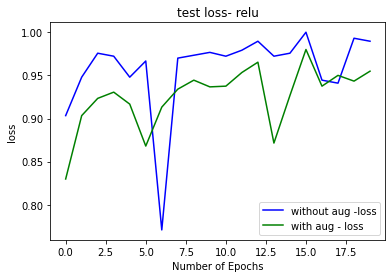

In [57]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history1.history['accuracy'], color='b', label="without aug -loss")
plt.plot(history.history['accuracy'], color='g', label="with aug - loss")
plt.title("test loss- relu")
plt.xlabel("Number of Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()